# Kurapati Venkatesh
# 09012021
# Topic: Network Analytics

# ---------------------------------------------------------------------------

## Problem Statement:

## There are two dataset consists of information for the connecting routes and flight hault. Create network analytics model on both the datasets separately and measure degree Centrality, degree of closeness centrality and degree of in-between centrality respectively.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To derive node strength of the network via measure of degree Centrality, degree of closeness centrality and degree of in-between centrality respectively.

## -------------------------------------------------------------------------------------------

##### Data Set Information:

##### There are two datasets considered for this problem.  

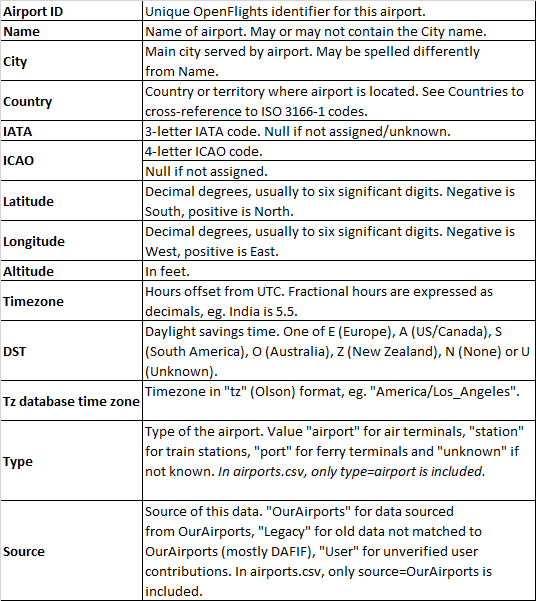

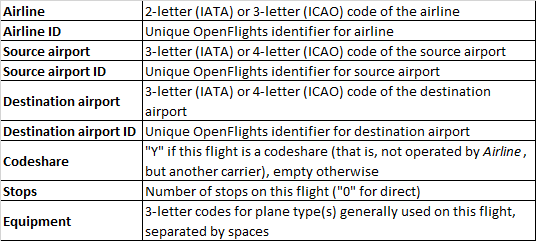

- Routes are directional: if an airline operates services from A to B and from B to A, both A-B and B-A are listed separately.
- Routes where one carrier operates both its own and codeshare flights are listed only once.

## ---------------------------------------------------------------------------------------------------------------------------

In [1]:
#importing libraries
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import seaborn as sns # for data visualization

We load the first dataset containing many flight routes:

In [2]:
names = ('airline,airline_id,'
         'source,source_id,'
         'dest,dest_id,'
         'codeshare,stops,equipment').split(',')
routes = pd.read_csv(r"G:\360digit\assignments meterial\network\connecting_routes.csv",
    names=names,
    header=None)
routes

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [4]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   airline     67663 non-null  object
 1   airline_id  67663 non-null  object
 2   source      67663 non-null  object
 3   source_id   67663 non-null  object
 4   dest        67663 non-null  object
 5   dest_id     67663 non-null  object
 6   codeshare   14597 non-null  object
 7   stops       67663 non-null  int64 
 8   equipment   67645 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


We load the second dataset with details about the airports:

In [5]:
names = ('id,name,city,country,iata,icao,lat,lon,'
         'alt,timezone,dst,tz,type,source').split(',')
airports = pd.read_csv(
    r"G:\360digit\assignments meterial\network\flight_hault.csv",
    header=None,
    names=names,
    index_col=4,
    na_values='\\N')
airports

,id,name,city,country,icao,lat,lon,alt,timezone,dst,tz,type,source
iata,,,,,,,,,,,,,
GKA,1,Goroka,Goroka,Papua New Guinea,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby,NaN,NaN
MAG,2,Madang,Madang,Papua New Guinea,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby,NaN,NaN
HGU,3,Mount Hagen,Mount Hagen,Papua New Guinea,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby,NaN,NaN
LAE,4,Nadzab,Nadzab,Papua New Guinea,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby,NaN,NaN
POM,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YMU,9537,Mansons Landing Water Aerodrome,Mansons Landing,Canada,NaN,50.066667,-124.983333,0,-8.0,A,America/Vancouver,NaN,NaN
YMP,9538,Port McNeill Airport,Port McNeill,Canada,NaN,50.575556,-127.028611,225,-8.0,A,America/Vancouver,NaN,NaN
YTG,9539,Sullivan Bay Water Aerodrome,Sullivan Bay,Canada,NaN,50.883333,-126.833333,0,-8.0,A,America/Vancouver,NaN,NaN


In [6]:
airports.describe()

,id,lat,lon,alt,timezone,type,source
count,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,0.0,0.0
mean,4766.361046,26.817720,-3.921969,933.449365,0.169236,NaN,NaN
std,2943.205193,27.866953,85.900873,1624.740899,5.737326,NaN,NaN
min,1.000000,-89.999997,-179.877000,-1266.000000,-12.000000,NaN,NaN
25%,2091.500000,8.824927,-79.022498,38.000000,-5.000000,NaN,NaN
50%,4257.000000,34.987800,5.292028,272.000000,1.000000,NaN,NaN
75%,7508.500000,47.957599,49.785821,1020.000000,4.000000,NaN,NaN
max,9541.000000,82.517778,179.951000,14472.000000,13.000000,NaN,NaN


In [7]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8107 entries, GKA to OLT
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8107 non-null   int64  
 1   name      8107 non-null   object 
 2   city      8107 non-null   object 
 3   country   8107 non-null   object 
 4   icao      6785 non-null   object 
 5   lat       8107 non-null   float64
 6   lon       8107 non-null   float64
 7   alt       8107 non-null   int64  
 8   timezone  8107 non-null   float64
 9   dst       8107 non-null   object 
 10  tz        8015 non-null   object 
 11  type      0 non-null      float64
 12  source    0 non-null      float64
dtypes: float64(5), int64(2), object(6)
memory usage: 886.7+ KB


We construct the list of edges representing our graph, where nodes are airports, and two airports are connected if there exists a route between them (flight network):

In [8]:
edges = routes[['source', 'dest']].values
edges

array([['AER', 'KZN'],
       ['ASF', 'KZN'],
       ['ASF', 'MRV'],
       ...,
       ['FRU', 'DME'],
       ['FRU', 'OSS'],
       ['OSS', 'FRU']], dtype=object)

 We create the networkX graph from the edges array:

In [9]:
g = nx.from_edgelist(edges)

In [10]:
nx.degree_assortativity_coefficient(g)

-0.006440915553092966

In [11]:
nx.degree_pearson_correlation_coefficient(g)

-0.006440915553091394

Let's take a look at the graph's statistics:

In [12]:
len(g.nodes()), len(g.edges())

(3425, 19257)

###### There are 3425 airports and 19257 routes in the dataset

Let's plot the graph:

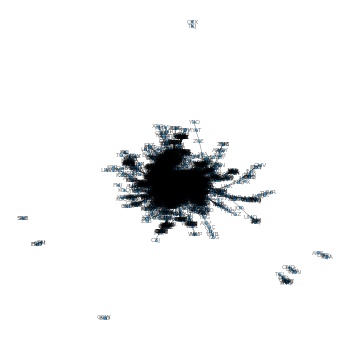

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

###### There are a few airports that are not connected to the rest of the airports. 

### Network Models:

Network models can be very useful for comparing their topology to the structural properties of our network built from real data. Different network models have very distinct structural characteristics, which defines their behavior in case of information flow on the network, attacks/failures on the nodes/edges, etc, and these properties have been extensively studied and are well documented. Knowing to which network model your graph corresponds to can provide valuable insights about its potential behavior under various circumstances.

There are a miriad of network models with different topological properties. Here we will try out some of the most useful ones (that frequently occur in real complex systems).

In [15]:
# Barabasi-Albert (scale-free) network 
ba = nx.barabasi_albert_graph(50, 3)

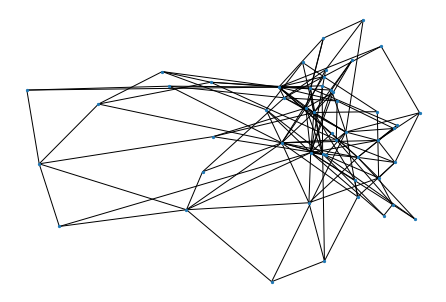

In [16]:
nx.draw_spectral(ba, node_size=5)

In [17]:
# Erdos-Renyi (random) network 
er = nx.erdos_renyi_graph(50, 0.1)

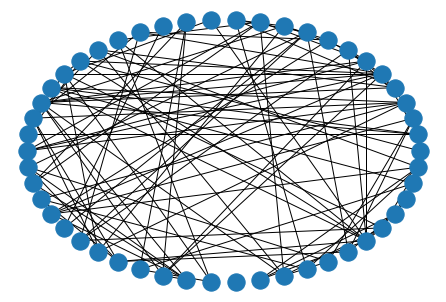

In [18]:
nx.draw_circular(er)

In [19]:
# Watts-Strogatz (small-world) network 
ws = nx.watts_strogatz_graph(50, 6, 0.2)

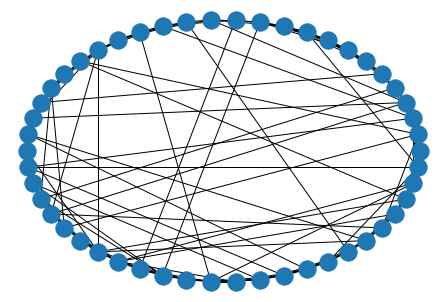

In [20]:
nx.draw_circular(ws)

In [21]:
# random geometric graph (RGG)
rgg = nx.random_geometric_graph(200, 0.125)

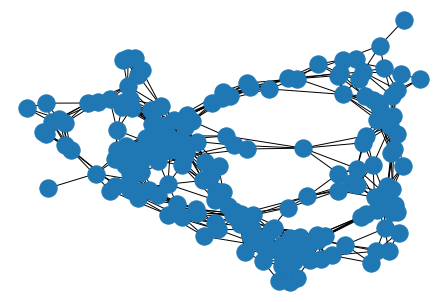

In [22]:
nx.draw(rgg)

In [23]:
# complete graph (every pair of nodes is connected by a unique edge)
complete = nx.complete_graph(25)

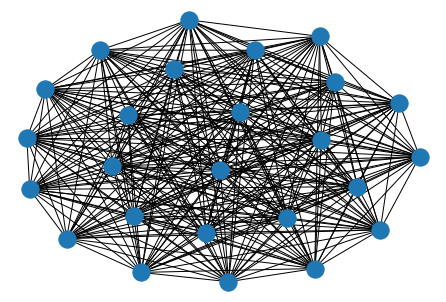

In [24]:
nx.draw(complete)

### Analysis of Structural Properties:

Node degree, network average degree, degree distribution:

In [25]:
degrees = [deg for node, deg in nx.degree(g)]

In [26]:
# kmin - minimum degree
kmin = np.min(degrees)

# kmax - maximum degree
kmax = np.max(degrees)

# kavg - average degree of the network
kavg = np.mean(degrees)

##### Degree distribution: helps us understand connectivity trends in networks and how edges are distributed among nodes (does everyone have similar number of connections, or do we have hubs, nodes with significantly higher number of connections?)

In [27]:
def degree_distr(net):
    degrees = dict(net.degree()) 
    hist = list(Counter(degrees.values()).items()) 
    hist.sort(key=lambda x:x[0])
    hist = np.array(hist)
    return hist

#### Paths on Networks: average path length, shortest path, longest path:

In [28]:
# find shortest path between node1 and node2 in directed & undirected networks 
nx.shortest_path(g, 'ATL', 'LAX')
#nx.shortest_path(G, node1, node2, weighted=True)

['ATL', 'LAX']

In [29]:
# average path length in graph
#nx.average_shortest_path_length(g, weight=None)
# here graph is entirely not connected

## Centrality measures:

### Degree Centrality:

In [30]:
b = nx.degree_centrality(g)
print(b)

{'AER': 0.005257009345794392, 'KZN': 0.006133177570093458, 'ASF': 0.0020443925233644858, 'MRV': 0.004672897196261682, 'CEK': 0.0040887850467289715, 'OVB': 0.01547897196261682, 'DME': 0.055490654205607476, 'NBC': 0.0020443925233644858, 'TGK': 0.0002920560747663551, 'UUA': 0.0008761682242990653, 'EGO': 0.002628504672897196, 'KGD': 0.0029205607476635513, 'GYD': 0.01139018691588785, 'LED': 0.03300233644859813, 'SVX': 0.019567757009345793, 'NJC': 0.002628504672897196, 'NUX': 0.0029205607476635513, 'BTK': 0.0011682242990654205, 'IKT': 0.008177570093457943, 'HTA': 0.002628504672897196, 'KCK': 0.0002920560747663551, 'ODO': 0.0002920560747663551, 'UKX': 0.0002920560747663551, 'ULK': 0.0005841121495327102, 'YKS': 0.006717289719626168, 'MJZ': 0.0017523364485981306, 'AYP': 0.0002920560747663551, 'LIM': 0.01664719626168224, 'CUZ': 0.0014602803738317756, 'PEM': 0.0005841121495327102, 'HUU': 0.0002920560747663551, 'IQT': 0.0011682242990654205, 'PCL': 0.0008761682242990653, 'TPP': 0.000876168224299065

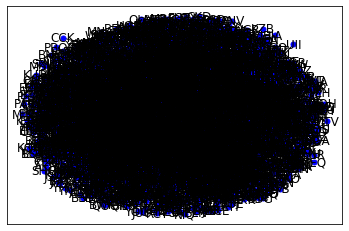

In [31]:
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g, pos, node_size = 25, node_color = 'blue')

### Closeness centrality:

In [32]:
closeness = nx.closeness_centrality(g)
print(closeness)

{'AER': 0.28031199833244147, 'KZN': 0.2821671250701698, 'ASF': 0.2702365991625976, 'MRV': 0.2912936929830162, 'CEK': 0.27198231362747227, 'OVB': 0.314876037390167, 'DME': 0.3388219466816836, 'NBC': 0.27912728697792466, 'TGK': 0.25256665956528324, 'UUA': 0.25766745501550004, 'EGO': 0.25826015733496527, 'KGD': 0.27171902000343795, 'GYD': 0.3160282390657362, 'LED': 0.3292501438868638, 'SVX': 0.3141418552473994, 'NJC': 0.26800039560491856, 'NUX': 0.26885608013750134, 'BTK': 0.2629169441856699, 'IKT': 0.2897152048823857, 'HTA': 0.2683420149747145, 'KCK': 0.22423466959341032, 'ODO': 0.22423466959341032, 'UKX': 0.22423466959341032, 'ULK': 0.22438404982763419, 'YKS': 0.2838793908101658, 'MJZ': 0.2552462088483341, 'AYP': 0.24616158532212357, 'LIM': 0.32739395139605526, 'CUZ': 0.2465038767537044, 'PEM': 0.24617957695970008, 'HUU': 0.24616158532212357, 'IQT': 0.2494060697491756, 'PCL': 0.24619757122744074, 'TPP': 0.24619757122744074, 'ABJ': 0.29416846916704076, 'BOY': 0.22715328918010633, 'OUA': 

### Betweeness Centrality:

In [33]:
b = nx.betweenness_centrality(g) 
print(b)

{'AER': 2.6919317731708027e-05, 'KZN': 4.855652034256442e-05, 'ASF': 7.792350098699574e-07, 'MRV': 2.9255326534146968e-05, 'CEK': 4.175908075972972e-06, 'OVB': 0.0015447465030426573, 'DME': 0.029360421912011502, 'NBC': 6.979147051473585e-07, 'TGK': 0.0, 'UUA': 7.394544691718019e-08, 'EGO': 4.0577592268671767e-07, 'KGD': 5.458081932220729e-06, 'GYD': 0.00030101815060444163, 'LED': 0.00796806516576167, 'SVX': 0.004151419248706718, 'NJC': 5.39111506977432e-06, 'NUX': 8.064876207670106e-06, 'BTK': 2.90770819149785e-07, 'IKT': 0.0028538077610340334, 'HTA': 2.1682506469788773e-05, 'KCK': 0.0, 'ODO': 0.0, 'UKX': 0.0, 'ULK': 0.0, 'YKS': 0.0032670919908927053, 'MJZ': 3.839475128392048e-07, 'AYP': 0.0, 'LIM': 0.012843276507220109, 'CUZ': 2.082255029948068e-06, 'PEM': 0.0, 'HUU': 0.0, 'IQT': 5.550682327265027e-06, 'PCL': 0.0, 'TPP': 0.0, 'ABJ': 0.0003591174849344738, 'BOY': 0.0, 'OUA': 0.0002924317603406076, 'ACC': 0.0029523873889597597, 'BKO': 6.421470558873646e-05, 'DKR': 0.001650211094468769, 

### Eigen-Vector Centrality:

In [34]:
evg = nx.eigenvector_centrality(g) # Eigen vector centrality
print(evg)

{'AER': 0.009032525853139125, 'KZN': 0.008848835694617902, 'ASF': 0.004687780297220764, 'MRV': 0.009820605305261815, 'CEK': 0.006710791087585149, 'OVB': 0.022818718556448188, 'DME': 0.07601137131350527, 'NBC': 0.006293487194115851, 'TGK': 0.0010881261201796393, 'UUA': 0.0020775297280268197, 'EGO': 0.0032727713371907005, 'KGD': 0.007799912752598012, 'GYD': 0.03206600106515401, 'LED': 0.06563214052190079, 'SVX': 0.02792863264111086, 'NJC': 0.003483274887440672, 'NUX': 0.004410772890346838, 'BTK': 0.0021005093384218604, 'IKT': 0.0072790702489984, 'HTA': 0.003137060156127371, 'KCK': 0.00010420859652977954, 'ODO': 0.00010420859652977954, 'UKX': 0.00010420859652977954, 'ULK': 0.00019466135029742033, 'YKS': 0.006318295494595464, 'MJZ': 0.001790186902909919, 'AYP': 0.00032967088219562315, 'LIM': 0.023023558944051444, 'CUZ': 0.0003695901053655978, 'PEM': 0.00033496343418323176, 'HUU': 0.00032967088219562315, 'IQT': 0.0007907702178921818, 'PCL': 0.00034594904369196196, 'TPP': 0.00034594904369196

### Cluster coefficient:

In [35]:
cluster_coeff = nx.clustering(g)
print(cluster_coeff)

{'AER': 0.5163398692810458, 'KZN': 0.42857142857142855, 'ASF': 0.5714285714285714, 'MRV': 0.5, 'CEK': 0.5494505494505495, 'OVB': 0.260522496371553, 'DME': 0.07435254803675856, 'NBC': 0.8095238095238095, 'TGK': 0, 'UUA': 0.6666666666666666, 'EGO': 0.5, 'KGD': 0.6222222222222222, 'GYD': 0.4318488529014845, 'LED': 0.17714917825537294, 'SVX': 0.18995929443690637, 'NJC': 0.6111111111111112, 'NUX': 0.5777777777777777, 'BTK': 0.8333333333333334, 'IKT': 0.24338624338624337, 'HTA': 0.5277777777777778, 'KCK': 0, 'ODO': 0, 'UKX': 0, 'ULK': 1.0, 'YKS': 0.2490118577075099, 'MJZ': 0.8666666666666667, 'AYP': 0, 'LIM': 0.20614035087719298, 'CUZ': 0.6, 'PEM': 1.0, 'HUU': 0, 'IQT': 0.6666666666666666, 'PCL': 1.0, 'TPP': 1.0, 'ABJ': 0.5047619047619047, 'BOY': 1.0, 'OUA': 0.6190476190476191, 'ACC': 0.33793103448275863, 'BKO': 0.5666666666666667, 'DKR': 0.3548387096774194, 'COO': 0.5052631578947369, 'LFW': 0.525, 'NIM': 0.6666666666666666, 'BOG': 0.14365049981488337, 'GYE': 0.391812865497076, 'UIO': 0.2861

### Average clustering:

In [36]:
cc = nx.average_clustering(g) 
print(cc)

0.4870933566129556


## Components:

In [37]:
# checks whether the network is connected
nx.is_connected(g)

False

In [38]:
# find number of connected components
nx.number_connected_components(g)

8

In [39]:
# get the nodes in the same component as *n*
nx.node_connected_component(g, 'ATL')

{'PTY',
 'UTH',
 'TMU',
 'LAE',
 'IFO',
 'IEV',
 'ULK',
 'BJA',
 'VOZ',
 'JLR',
 'BMI',
 'DUJ',
 'KHS',
 'GAE',
 'PIE',
 'FKB',
 'KUT',
 'ATA',
 'HAU',
 'IZA',
 'CDG',
 'CLJ',
 'ZHA',
 'DLE',
 'UGB',
 'WAT',
 'CIU',
 'YIW',
 'NYT',
 'LDH',
 'LAI',
 'UIH',
 'AHO',
 'IKS',
 'RES',
 'OAJ',
 'DUD',
 'MYD',
 'HRG',
 'HND',
 'ACU',
 'HNH',
 'SGY',
 'CJM',
 'USM',
 'YXP',
 'MRD',
 'LIN',
 'KTL',
 'DCY',
 'SHH',
 'YXX',
 'CZE',
 'YBP',
 'ZNZ',
 'RSW',
 'SCO',
 'LPL',
 'TGC',
 'OZZ',
 'BUC',
 'ULN',
 'ASR',
 'DDG',
 'BWI',
 'TRS',
 'HOB',
 'UAK',
 'ERM',
 'DRS',
 'AEP',
 'AOJ',
 'PWE',
 'WNN',
 'KXU',
 'YVZ',
 'RIY',
 'EWR',
 'KLO',
 'SRY',
 'OAX',
 'MSZ',
 'TAH',
 'YPX',
 'HEL',
 'QUB',
 'AQP',
 'MVY',
 'ANM',
 'AGA',
 'CBS',
 'KDH',
 'NYI',
 'KFS',
 'ZBL',
 'TLN',
 'SFJ',
 'AGT',
 'MZH',
 'THU',
 'PVK',
 'LJA',
 'BLR',
 'TUR',
 'FSC',
 'WYA',
 'UNN',
 'TTT',
 'SDN',
 'NAH',
 'YXE',
 'ICN',
 'TIJ',
 'BTM',
 'NAO',
 'OKJ',
 'BVH',
 'BWK',
 'PXU',
 'SPP',
 'CGI',
 'TAS',
 'YQY',
 'LTI',
 'NQN',


In [40]:
len(nx.node_connected_component(g, 'ATL'))

3397

Among 3425 nodes, Atlanta's connections are 3397.

## Assortativity:

- Pearson correlation coefficient [-1; 1]
- social networks are highly assortative (homophily): high degree nodes connect to other high degree nodes
- technological are disassortative: high degree nodes connect to low degree nodes

Assortativity computed based on:
* degree
* attribute

In [41]:
nx.degree_assortativity_coefficient(ba)

-0.21067860882361197

In [42]:
nx.degree_pearson_correlation_coefficient(ba)

-0.21067860882361256

## Network Visualization:

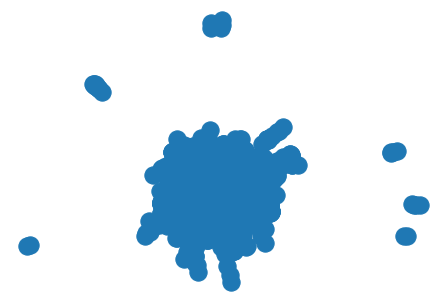

In [43]:
nx.draw(g)

As this network is huge, we can visualise in small scale

### let's create a scale-free network:

* There are two major components that explain the emergence of the scale-free property in a complex networks: the growth and the preferential attachment. 
* By "growth" is called a growth process where, over an extended period of time, new nodes join an already existing system, a network (like the World Wide Web which has grown by billions of web pages over 10 years). 
* Finally, by "preferential attachment" is called a new coming node who prefers to connect to another node which has already a certain number of links with others. 
* Thus, there is a higher probability that more and more nodes will link themselves to that one which has already many links, leading this node to a hub in-fine. Depending on the network, the hubs might either be assortative or disassortative. 
* Assortativity would be found in social networks in which well-connected/famous people would tend to know better each other. 
* Disassortativity would be found in technological (Internet, World Wide Web) and biological (protein interaction, metabolism) networks.

In [44]:
G = nx.barabasi_albert_graph(100, 5)

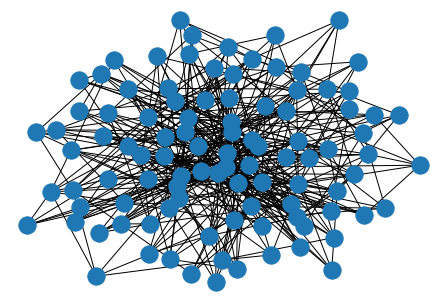

In [45]:
# simplest way to draw a graph
nx.draw(G)

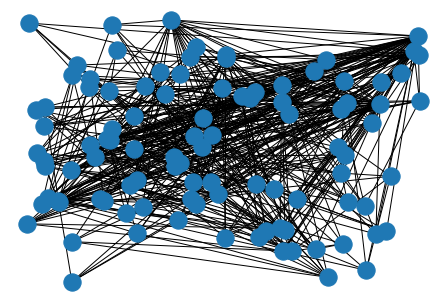

In [46]:
# draw a graph with random layout
nx.draw_random(G)

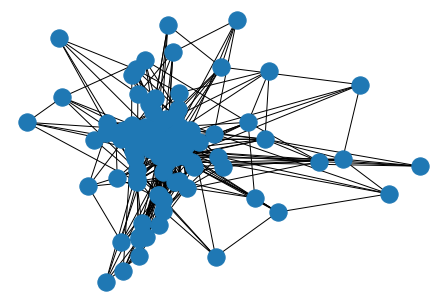

In [47]:
# draw a graph with spectral layout
nx.draw_spectral(G)

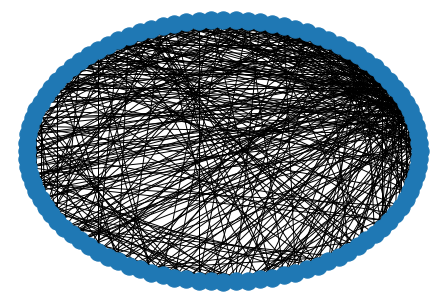

In [48]:
# draw a graph with circular layout
nx.draw_circular(G)

##### find cliques:

In [50]:
cli = nx.find_cliques(ba)

In [51]:
list(cli)

[[3, 0, 9],
 [3, 0, 44],
 [3, 1],
 [3, 2, 5, 46],
 [3, 2, 45],
 [3, 35],
 [3, 38, 28],
 [3, 40, 19],
 [3, 9, 19],
 [3, 13],
 [3, 18],
 [3, 24, 5],
 [4, 0, 9],
 [4, 1],
 [4, 33],
 [4, 37],
 [4, 8, 2, 5],
 [4, 8, 18],
 [4, 9, 19],
 [4, 13],
 [4, 16],
 [4, 19, 31],
 [4, 22],
 [4, 30],
 [6, 0, 44],
 [6, 35, 36],
 [6, 5, 2],
 [6, 5, 29],
 [6, 41, 33],
 [6, 42, 37],
 [6, 11, 25],
 [6, 11, 2],
 [6, 11, 29],
 [6, 20, 33],
 [6, 20, 2],
 [6, 20, 37],
 [6, 20, 23],
 [6, 25, 27],
 [7, 32],
 [7, 1, 26],
 [7, 2, 20],
 [7, 2, 5],
 [7, 35],
 [7, 43],
 [7, 13],
 [7, 16],
 [7, 21],
 [7, 22],
 [8, 2, 10, 5],
 [8, 2, 11],
 [8, 36],
 [8, 38],
 [8, 39],
 [8, 12],
 [8, 17],
 [10, 34],
 [11, 14],
 [12, 0, 9],
 [12, 0, 15],
 [12, 28],
 [12, 47],
 [14, 0],
 [14, 1],
 [15, 1, 26],
 [15, 16],
 [15, 22],
 [16, 17],
 [16, 45],
 [17, 9],
 [17, 21],
 [20, 24],
 [20, 31],
 [21, 19],
 [22, 25],
 [22, 28],
 [22, 23],
 [23, 43],
 [25, 30, 27],
 [26, 41],
 [27, 18],
 [29, 32],
 [30, 34],
 [32, 24],
 [33, 48],
 [33, 47],
 

In [56]:
# assign selected subgraph to a new graph
nodes = list(ba.neighbors(20))
nodes.append(20)
g_sub = ba.subgraph(nodes)

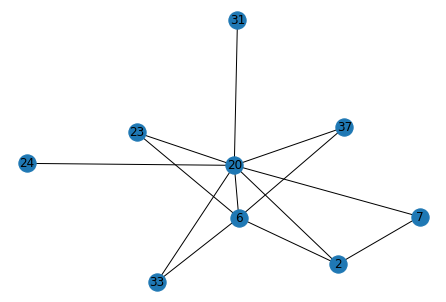

In [57]:
# with_labels=True to show node labels
nx.draw(g_sub, with_labels=True)

The above mentioned nodes are highly preferrable to allow a new attribute to join in their network.